<a href="https://colab.research.google.com/github/peguescj/data-management/blob/main/PS0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now:
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl

from google.colab import files

#import webbrowser

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections])

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib
#%matplotlib --list
#interactive plots:
#%matplotlib notebook
#static images of your plot:
%matplotlib inline
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;)
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

PS0 Submission


In [3]:
#Uploading a final dataset I used for my Quant project. I think there's some potenial here I didn't explore.
#urllib.request.urlretrieve("https://drive.google.com/uc?id=1BWUKYpn46TNe8sTDsFXBjkDofaE50OdT&export=download", "final_data.csv")
!wget -q -O final_data.csv https://drive.google.com/uc?id=1BWUKYpn46TNe8sTDsFXBjkDofaE50OdT&export=download

In [4]:
# basic navigation
#wd =  'final_data'  #'C:\Users\ref\Desktop\junk' # may need to ADJUST
#os.makedirs(wd)
#os.getcwd() #pwd
!pwd
#os.listdir() #compare to clicking on the left the folder icon #dir
!ls
#os.chdir(wd)
#os.getcwd()

/content
final  final_data.csv  sample_data


In [5]:
dat=pd.read_csv('final_data.csv') #read it in  ; or full path: '/content/final_data.csv'

In [6]:
dat.columns #list var names

Index(['COUNTY_CODE', 'COUNTY_NAME', 'DISTRICT_CODE', 'DISTRICT_NAME',
       'Districtwide Grad Rate', 'Districtwide Graduated Class Size',
       'Districtwide Graduated', 'Disabled Grad Rate',
       'Disabled Graduated Class Size', 'Disabled Graduated',
       'Harassment, Intimidation, Bullying (HIB)', 'Substances', 'Vandalism',
       'Violence', 'Weapons', 'Total Unique Incidents',
       'Incidents Per 100 Students Enrolled', 'Total Enrollment',
       'English as Home Language %', 'InSchoolSuspensionRate',
       'OutSchoolSuspensionRate', 'StudentSuspensionRate', 'TeacherCount',
       'TeacherAvgYearsExpInSchool', 'TeacherAvgYearsExpInDistrict',
       'TeacherInDistrict4YearsOrMore', 'Federal Per Pupil',
       'StateLocal Per Pupil', 'Total Per Pupil',
       'Administration Salaries and Benefits',
       'Board Contribution to Food Services',
       'Classroom-General Supplies and Textbooks',
       'Classroom-Purchased Services', 'Classroom-Salaries and Benefits',
      

In [7]:
dat.head(2)
dat.tail(2)

,COUNTY_CODE,COUNTY_NAME,DISTRICT_CODE,DISTRICT_NAME,Districtwide Grad Rate,Districtwide Graduated Class Size,Districtwide Graduated,Disabled Grad Rate,Disabled Graduated Class Size,Disabled Graduated,...,Legal Costs,Operations and Maintenance-Salaries and Benefits,Support Services-Salaries and Benefits,Total Classroom Instruction,Total Budgetary Comparative Per Pupil Cost,Total Administrative Costs,Total Support Services,Total Operations and Maintenance of Plant,Total Extracurricular Costs,Total Equipment Costs
0,1.0,ATLANTIC,110.0,ATLANTIC CITY,80.54,514.0,414.0,71.79,78.00,56.00,...,$47,"$2,567","$6,847","$15,695","$30,930","$2,017","$8,294","$3,907",$719,$24
1,1.0,ATLANTIC,120.0,ATLANTIC CO VOCATIONAL,98.74,318.0,314.0,96.08,51.00,49.00,...,$108,"$1,264","$1,578","$10,894","$16,669","$1,582","$1,760","$2,280",$115,$54


,COUNTY_CODE,COUNTY_NAME,DISTRICT_CODE,DISTRICT_NAME,Districtwide Grad Rate,Districtwide Graduated Class Size,Districtwide Graduated,Disabled Grad Rate,Disabled Graduated Class Size,Disabled Graduated,...,Legal Costs,Operations and Maintenance-Salaries and Benefits,Support Services-Salaries and Benefits,Total Classroom Instruction,Total Budgetary Comparative Per Pupil Cost,Total Administrative Costs,Total Support Services,Total Operations and Maintenance of Plant,Total Extracurricular Costs,Total Equipment Costs
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dat #get spreadsheet view: can sort on cols, filter, and copy

,COUNTY_CODE,COUNTY_NAME,DISTRICT_CODE,DISTRICT_NAME,Districtwide Grad Rate,Districtwide Graduated Class Size,Districtwide Graduated,Disabled Grad Rate,Disabled Graduated Class Size,Disabled Graduated,...,Legal Costs,Operations and Maintenance-Salaries and Benefits,Support Services-Salaries and Benefits,Total Classroom Instruction,Total Budgetary Comparative Per Pupil Cost,Total Administrative Costs,Total Support Services,Total Operations and Maintenance of Plant,Total Extracurricular Costs,Total Equipment Costs
0,1.0,ATLANTIC,110.0,ATLANTIC CITY,80.54,514.0,414.0,71.79,78.00,56.00,...,$47,"$2,567","$6,847","$15,695","$30,930","$2,017","$8,294","$3,907",$719,$24
1,1.0,ATLANTIC,120.0,ATLANTIC CO VOCATIONAL,98.74,318.0,314.0,96.08,51.00,49.00,...,$108,"$1,264","$1,578","$10,894","$16,669","$1,582","$1,760","$2,280",$115,$54
2,1.0,ATLANTIC,590.0,BUENA REGIONAL,86.98,169.0,147.0,78.38,37.00,29.00,...,$83,"$3,348","$5,211","$32,576","$56,699","$2,745","$8,872","$10,706",$606,$0
3,1.0,ATLANTIC,1310.0,EGG HARBOR TWP,94.18,584.0,550.0,70.15,67.00,47.00,...,$57,$936,"$1,397","$10,764","$16,904","$2,153","$2,011","$1,688",$214,$48
4,1.0,ATLANTIC,1790.0,GREATER EGG HARBOR REG,90.11,839.0,756.0,79.87,149.00,119.00,...,$50,"$1,241","$2,390","$8,841","$16,055","$1,908","$2,865","$1,954",$485,$73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
dat["Violence"][0:50] #subset or slice

0     79.0
1     23.0
2     30.0
3     69.0
4     59.0
5      9.0
6      9.0
7     12.0
8      6.0
9      9.0
10     1.0
11     1.0
12     6.0
13     0.0
14    17.0
15    12.0
16     2.0
17    34.0
18    49.0
19    25.0
20    19.0
21     6.0
22    42.0
23    10.0
24     5.0
25     7.0
26     6.0
27    11.0
28     1.0
29     6.0
30     4.0
31     4.0
32     4.0
33     8.0
34    18.0
35     0.0
36     2.0
37     7.0
38    11.0
39    12.0
40    22.0
41     4.0
42     0.0
43     4.0
44     7.0
45    14.0
46     5.0
47     3.0
48     3.0
49     0.0
Name: Violence, dtype: float64

In [13]:
#keep it simple! especially when figuring things out! keep only vars needed, say 5 or 10
#dont have a dataset with 500vars--you won't use them! just clutter and mess!
#and then later whenever you need more vars, just rerun the code retaining more
dat[["Violence","Total Per Pupil", "Legal Costs"]][0:50]

,Violence,Total Per Pupil,Legal Costs
0,79.0,17862,$47
1,23.0,12529,$108
2,30.0,16795,$83
3,69.0,14369,$57
4,59.0,15868,$50
5,9.0,11261,$272
6,9.0,17617,$22
7,12.0,19628,$2
8,6.0,28329,$71
9,9.0,15454,$48


In [14]:
# if data big take random sample! way better to learn and figure things out with small sample!!
# say frac=.1 for 10perc, or n=10 for 10obs
dat.sample(frac=0.5, replace=False, random_state=1) #random_state to ensure reproducibility of results;

,COUNTY_CODE,COUNTY_NAME,DISTRICT_CODE,DISTRICT_NAME,Districtwide Grad Rate,Districtwide Graduated Class Size,Districtwide Graduated,Disabled Grad Rate,Disabled Graduated Class Size,Disabled Graduated,...,Legal Costs,Operations and Maintenance-Salaries and Benefits,Support Services-Salaries and Benefits,Total Classroom Instruction,Total Budgetary Comparative Per Pupil Cost,Total Administrative Costs,Total Support Services,Total Operations and Maintenance of Plant,Total Extracurricular Costs,Total Equipment Costs
657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304,80.0,CHARTERS,8010.0,Union County TEAMS CS,100.00,32.0,32.0,-,-,-,...,-,-,-,-,-,-,-,-,-,-
85,9.0,CAPE MAY,3130.0,MIDDLE TWP,81.52,211.0,172.0,64.29,56.00,36.00,...,$33,"$1,014","$2,341","$8,574","$14,184","$1,180","$2,548","$1,577",$164,$79
60,5.0,BURLINGTON,3360.0,MOORESTOWN TWP,99.43,350.0,348.0,96.23,53.00,51.00,...,$67,"$1,582","$2,804","$9,134","$16,497","$1,406","$3,060","$2,470",$109,$45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,3.0,BERGEN,3960.0,PASCACK VALLEY REGIONAL,97.20,535.0,520.0,82.93,82.00,68.00,...,$24,$809,"$1,892","$7,890","$14,574","$1,574","$2,509","$1,800",$736,$95
600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#dat["Violence"]

In [ ]:
dat["Violence"].mean() # median, mode, stdev

65.4

In [16]:
dat["Violence"].value_counts(dropna=False) #.nlargest(3) a tab or freq table

NaN      364
9.0       18
6.0       16
4.0       15
7.0       15
        ... 
69.0       1
152.0      1
72.0       1
32.0       1
79.0       1
Name: Violence, Length: 71, dtype: int64

<Axes: >

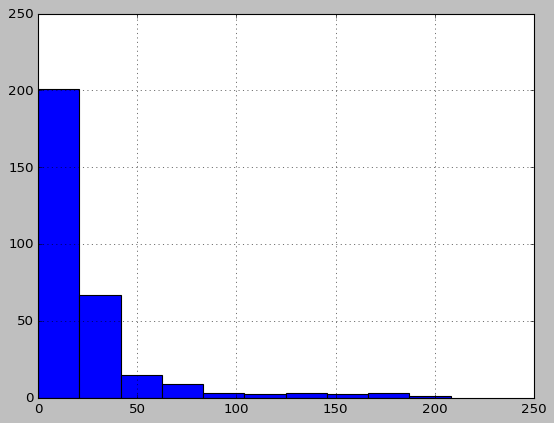

In [17]:
dat["Violence"].hist() #again, always interpret all output

In [19]:
pd.crosstab(dat["Violence"], dat["Total Per Pupil"]) #too many numbers for a crosstab!

Total Per Pupil,-,10656,10925,11012,11261,11510,11735,11753,11851,11907,...,21421,21647,22604,23019,23036,23305,26913,28329,31197,9201
Violence,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4.0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
171.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
172.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


TypeError: ignored

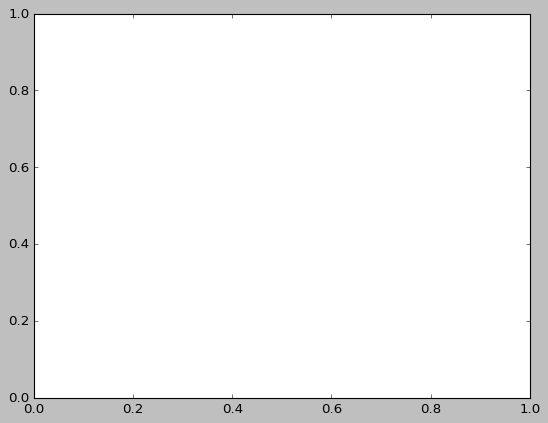

In [24]:
dat.plot(kind='scatter', y='Violence', x='Total Per Pupil')

In [25]:
dat[['Violence','Total Per Pupil']].corr().round(2)

<ipython-input-25-a6f224062e51>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dat[['Violence','Total Per Pupil']].corr().round(2)


,Violence
Violence,1.0
